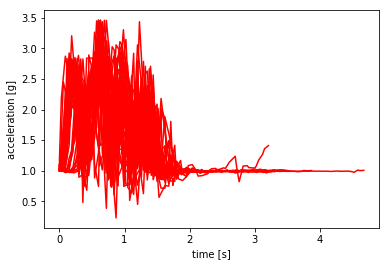

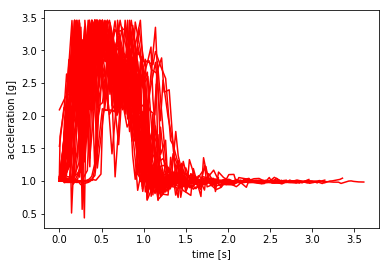

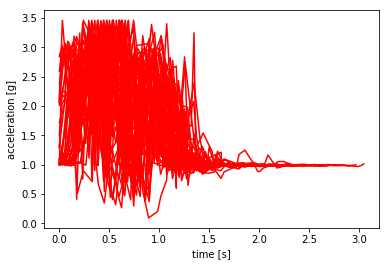

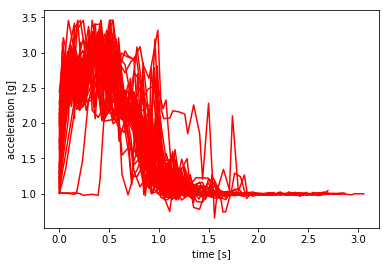

In [5]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas
#-----------Turning Kick------------------------------------
path = "csv/Right_TurningKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))

np_array_list = []
export_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    
    export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), "1"])
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')
    #df=df.iloc[start:end]
    #export_list.append([df['X (mg)'].mean(), df['X (mg)'].std(), df['X (mg)'].min(), df['X (mg)'].max(), "2"])
    #plt.show()

plt.show()
#-----------Axe Kick------------------------------------
path = "csv/Right_AxeKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))


np_array_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    
    export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), "2"])
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')

    
plt.show()
#-----------Cut Kick------------------------------------
path = "csv/Right_CutKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))


np_array_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    
    export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), "3"])
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')

plt.show()
#-----------Crescent Kick------------------------------------
path = "csv/Right_CrescentKick_CSV/"
allFiles = glob.glob(os.path.join(path,"*_Accelerometer.csv"))


np_array_list = []
for file_ in allFiles:
    df = pandas.read_csv(file_, skiprows=4)
    df.dropna(subset = ["Date"], inplace=True)
    acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
    acc = np.sqrt(acc)

    for i, j in enumerate(acc[:-1]):
        if (j < acc[i+1])and(j>1000): 
            start = i
            break

    end = max(idx for idx, val in enumerate(acc)  
                                      if val > 1000)


    acc=acc.iloc[start:end]
    HostTime = df['HostTimestamp']
    HostTime=HostTime.iloc[start:end]
    HostTime = HostTime.astype('int64')
    HostTime -= HostTime[start]
    HostTime /= 1000
    
    export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), "4"])
    acc=np.array(acc)/1000
    HostTime = np.array(HostTime)
    
    plt.plot(HostTime,acc,'r-')
    plt.xlabel('time [s]')
    plt.ylabel('acceleration [g]')
    
plt.show()
with open('Accelerometer.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "kick_Type"])
    for row in export_list:
        writer.writerow(row)
    

    
    

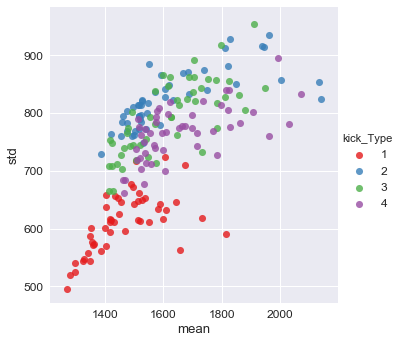

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer.csv')
sns.lmplot('mean', 'std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});


In [10]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['mean','std']].values
result = data['kick_Type']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [ 0.00952162 -0.07553502]
b =  40.897770488765566
Indices of support vectors =  [ 16  19  25  27  29  43  47  50  51  54  55  56  57  58  59  60  62  63
  64  65  66  68  69  70  71  72  73  74  76  77  78  79  80  82  84  85
  86  87  89  90  93  94  95  96  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 157 158 159 160 161 162 163
 164 165 169 170 171 172 174 175 176 177 179 181 182 183 184 185 186 188
 189 190 192 193 194 196 197 198]
Support vectors =  [[1504.55454638  717.86909632]
 [1487.93922796  677.98049856]
 [1604.85091687  723.84635493]
 [1673.96069204  709.889739  ]
 [1517.36386823  662.13504416]
 [1495.10228504  672.63604524]
 [1403.57180083  658.57597929]
 [1521.48149431  797.11862442]
 [1632.89743847  823.44672567]
 [1457.45870622  784.83557969]
 [1527.11549424  823.